<a href="https://colab.research.google.com/github/jinjuan-cmd/DeepLearning/blob/main/2_Image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of this project is integrate pretrained CNN with preprocessing capability to realize teh fucntion fo handwritten digits recognition. There are two method:

# Method 1: Threshold Method


1.   video capture
2.   convert the image to grayscale and binarize it

  $$ B(x,y)=   \left\{
\begin{array}{ll}
      255 & I(x,y)\geq Threshold \\
      0 & otherwise\\
\end{array} 
\right.  $$

3.   find contour of binary image 

     So what is contour? python list of all the contours in the image. Each individual contour is numpy array (x,y) coordinates the boundary of the object. It encode the information of the location of points on the curve.

     In order to find our ROI(region of interest) , we need to sort contourarea and find relative big contour area.
4.   find the bounding coordinate of each interested contour area.
5.  square image by setting the max side of ROI and filling 0 backgroud for short side, such that keep **Aspect Ratio**
6.  resize the squared image to the same shape in the pretrained model.
7.  load pretrained model and do predict of our processed images.






## Hand calculation of ROI
We can use opencv function to find bounding of ROI, another method is by hand calculation.

*   First, Compute $\bar X, \bar Y$

$\bar X=\frac{\iint_{\Omega} x B(x,y) \,dx$}{\iint_{\Omega}  B(x,y) \,dx$}$ ,
$\bar Y=\frac{\iint_{\Omega} y B(x,y) \,dx$}{\iint_{\Omega}  B(x,y) \,dx$}$
*   Find Width and Height of ROI
    
    finding "W,H" of ROI is based on search non-zero element of the binary image B(x,y) ,$(x_{min},y_{min}) and (x_{max},y_{max})$



In [ ]:
#code in 'digdetect_cam.py'

# Method 2 Canny
1.   video capture
2.   convert the image to grayscale and get canny map

     **Canny** emphasize the sudden changes in terms of intensity and color

3.  reduce noise before find contour
    
  There are two method to reduce noise. First, change canny threshold. increasing upper threshold and lower treshold will help getting rid of fine detais and random noise. Second,use Gaussian blur. We need to define kernel size(etc. 5by5, 7by7) and $\sigma$ (etc. 1.8-2.8). When increase the kernel size and increase the $\sigma$, fine details will be removed. 

  Let's now talk more about Gaussian blur. 

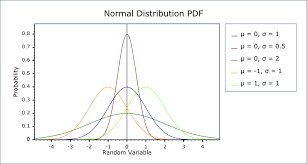

 

It is a weighted methods, weights high at the center, blur image emphasize the image pixel that close  to the center. $\sigma \downarrow$ means blur less. It is same with the kernerl size, when increase the size, more neighboring pixels are included, so that will lose more details.


3.   find contour of blured image 

     So what is contour? It can be explained that a curve joining all the continuous points (along the boundary), having same color or intensity. It is  python list of all the contours in the image. Each individual contour is numpy array (x,y) coordinates the boundary of the object. It encode the information of the location of points on the curve.

     In order to find our ROI(region of interest) , we need to sort contourarea and find relative big contour area.
4.   find the bounding coordinate of each interested contour area.
5.  square image by setting the max side of ROI and filling 0 backgroud for short side, such that keep **Aspect Ratio**
6.  resize the squared image to the same shape in the pretrained model.
7.  load pretrained model and do predict of our processed images.



In [ ]:
#code in 'MNIST_dectection.py'